In [118]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
%matplotlib inline

# Training Model and Evaluation

In [119]:
df = pd.read_csv("dataset/dataset_cleaned_train.csv")
df.describe()

,roll,pitch,yaw,acc_x,acc_y,acc_z,label
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,2422.446809,-3109.042553,1244.858156,-294.365248,194.822695,512.138298,0.500000
std,18515.337665,26160.904944,9315.447746,328.075101,490.224740,515.951843,0.500889
min,-64610.000000,-88060.000000,-32970.000000,-1043.000000,-1059.000000,-425.000000,0.000000
25%,-1470.000000,-4637.500000,-1470.000000,-639.500000,-14.000000,-68.500000,0.000000
50%,770.000000,-770.000000,770.000000,-112.000000,-4.000000,821.000000,0.500000
75%,7735.000000,1820.000000,2940.000000,16.000000,727.250000,996.000000,1.000000
max,54110.000000,68950.000000,35420.000000,31.000000,1025.000000,1012.000000,1.000000


In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

In [121]:
X = df[[col for col in df.columns if col != "label"]]
y = df["label"]

In [122]:
fscore = []

###  Logistic Regression

In [123]:
LoRe = LogisticRegression(solver="lbfgs", random_state=42)
LoRe_score = cross_val_score(LoRe, X, y, cv=5, scoring='f1_micro')
fscore.append(LoRe_score.mean())
LoRe_score

array([1., 1., 1., 1., 1.])

###  Random Forest

In [124]:
randF = RandomForestClassifier(n_estimators=200)
randF_score = cross_val_score(randF, X, y, cv=5, scoring='f1_micro')
fscore.append(randF_score.mean())
randF_score

array([1., 1., 1., 1., 1.])

###  Gradient Boosting

In [125]:
gbc = GradientBoostingClassifier()
gbc_score = cross_val_score(gbc, X, y, cv=5, scoring='f1_micro')
fscore.append(gbc_score.mean())
gbc_score

array([1., 1., 1., 1., 1.])

###  Gaussian Naive Bayes

In [126]:
gnb = GaussianNB()
gnb_score = cross_val_score(gnb, X, y, cv=5, scoring='f1_micro')
fscore.append(gnb_score.mean())
gnb_score

array([1., 1., 1., 1., 1.])

###  Bernoulli Naive Bayes

In [127]:
bnb = BernoulliNB()
bnb_score = cross_val_score(bnb, X, y, cv=5, scoring='f1_micro')
fscore.append(bnb_score.mean())
bnb_score

array([1.        , 1.        , 0.98214286, 1.        , 1.        ])

###  Multi-layer Perceptron

In [128]:
mlp = MLPClassifier(activation='relu', max_iter=500)
mlp_score = cross_val_score(mlp, X, y, cv=5, scoring='f1_micro')
fscore.append(mlp_score.mean())
mlp_score

array([0.79310345, 0.66071429, 0.96428571, 0.96428571, 0.98214286])

## F1 plot

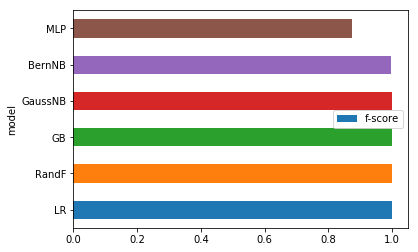

In [129]:
list_ = []
model_name = ["LR", "RandF", "GB", "GaussNB", "BernNB", "MLP"]
for i in range(len(model_name)):
    arr = {}
    arr["model"] = model_name[i]
    arr["f-score"] = fscore[i]
    list_.append(arr)
f1df = pd.DataFrame(list_)
f1df.plot.barh(x="model", y="f-score")

In [130]:
import pickle

LoRe = LogisticRegression(solver="lbfgs", random_state=42)
LoRe.fit(X, y)
pickle.dump(LoRe, open("model/lrmodel.pkl", 'wb'))

---
## Prediction
### Try with cleaned data

In [131]:
import os

model = {}
target = "model/lrmodel.pkl"
if os.path.getsize(target) > 0:      
    with open(target, "rb") as f:
        unpickler = pickle.Unpickler(f)
        model = unpickler.load()

In [132]:
df_test = pd.read_csv("dataset/dataset_cleaned_test.csv")
X_test = df_test[[col for col in df_test.columns if col != "label"]]
y_test = df_test["label"]

In [133]:
from sklearn.metrics import classification_report
y_hat = model.predict(X_test)
print(classification_report(y_test,y_hat))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       1.00      1.00      1.00        35

avg / total       1.00      1.00      1.00        70



### Try with messy data

In [134]:
df_test_1 = pd.read_csv("dataset.csv")
X_test = df_test_1[[col for col in df_test_1.columns if col != "label"]]
y_test = df_test_1["label"]

In [114]:
from sklearn.metrics import classification_report
y_hat = model.predict(X_test)
print(classification_report(y_test,y_hat))

             precision    recall  f1-score   support

          0       0.64      0.92      0.75       216
          1       0.96      0.78      0.86       528

avg / total       0.87      0.82      0.83       744

